# Genetic Algorithm

In this report, we analyse the performance of the Genetic Algorithm algorithm for optimizing the Sphere, Rastringin and Ackley functions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ga import GA
from functions import sphere, rastringin, ackley

## Population Size

In this section, we analyse the impact of the population size for optimizing each function. The number of individuals is set from 30 to 100, in steps of 10. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

### Sphere

In [3]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_particle_number = []

# varying the number of chromosomes
for n in range(30, 101, 10):
    ga = GA(sphere, bounds, pop_size=n)
    results = []
    # executing the algorithm 30 times
    for i in range(30):
        execution, _ = ga.run()
        results.append(execution)
        
    sphere_particle_number.append(n)
    sphere_results.append(results)

### Rastringin

In [5]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_particle_number = []

# varying the number of chromosomes
for n in range(30, 101, 10):
    ga = GA(rastringin, bounds, pop_size=n)
    results = []
    # executing the algorithm 30 times
    for i in range(30):
        execution, _ = ga.run()
        results.append(execution)
    
    rastringin_particle_number.append(n)
    rastringin_results.append(results)

### Ackley

In [6]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_particle_number = []

# varying the number of chromosomes
for n in range(30, 101, 10):
    ga = GA(ackley, bounds, pop_size=n)
    results = []
    # executing the algorithm 30 times
    for i in range(30):
        execution, _ = ga.run()
        results.append(execution)
    
    ackley_particle_number.append(n)
    ackley_results.append(results)

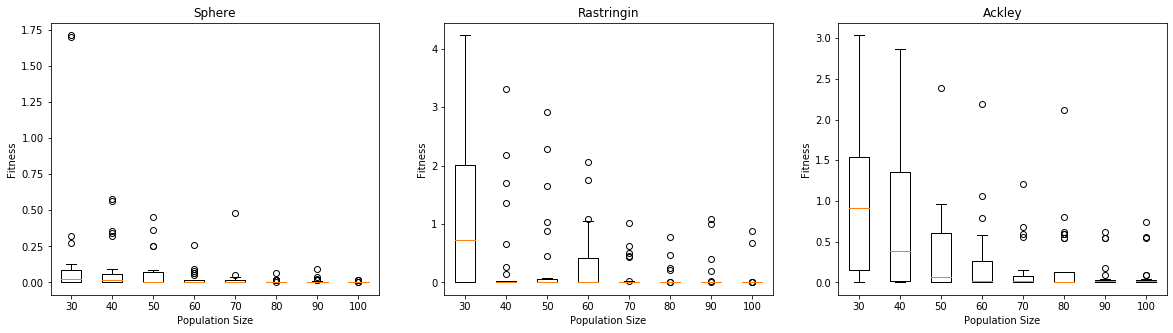

In [7]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), sphere_particle_number)
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Population Size")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), rastringin_particle_number)
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Population Size")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), ackley_particle_number)
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Population Size")

plt.show()

### Discussion

With the **sphere** function, a larger population leads to a better fitness value and a reduction in the appearance of outliers within each algorithm execution. However, with a larger population we see a impact on the performance. In this specific function, there is no need for a population of 100 individuals when 80 are enough to reach the global mininum.

In **rastringin**, a population of 30 is insuficient for reaching the global minimum, requiring at least 40. From this point onwards, increasing the population reduces the number of outliers and their distance to the median.

With **ackley**, we see a behavior similar to the **sphere** experiment, but with a more accentuated decline. The results from 70 individuals onward are very close, with 90 delivering the same performance of the population of 100.

## Crossover rate

In this section, we analyse the impact of the crossover rate for optimizing each function. The rate is set from 50% to 100% in steps of 10%. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

### Sphere

In [8]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_cross_probability = []

# varying the number of particles
for n in np.arange(0.5, 1.01, 0.1):
    ga = GA(sphere, bounds, cx_prob=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution,_ = ga.run()
        results.append(execution)
        
    sphere_cross_probability.append(n)
    sphere_results.append(results)

### Rastringin

In [9]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_cross_probability = []

# varying the number of particles
for n in np.arange(0.5, 1.01, 0.1):
    ga = GA(rastringin, bounds, cx_prob=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution,_ = ga.run()
        results.append(execution)
    
    rastringin_cross_probability.append(n)
    rastringin_results.append(results)

### Ackley

In [10]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_cross_probability = []

# varying the number of particles
for n in np.arange(0.5, 1.01, 0.1):
    ga = GA(ackley, bounds, cx_prob=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution,_ = ga.run()
        results.append(execution)
    
    ackley_cross_probability.append(n)
    ackley_results.append(results)

### Results

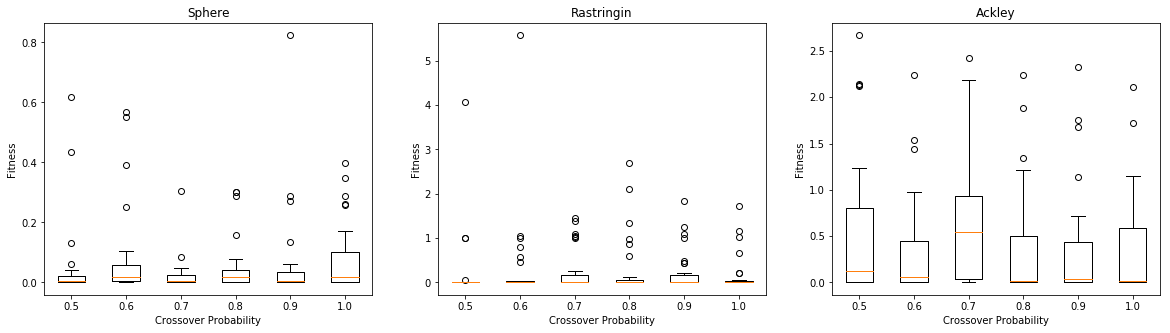

In [9]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), np.around(sphere_cross_probability,1))
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Crossover Probability")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), np.around(rastringin_cross_probability,1))
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Crossover Probability")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), np.around(ackley_cross_probability,1))
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Crossover Probability")

plt.show()

### Discussão

There is no clear pattern in the results. However, some crossover rates do seem to perform better in each function with a better fitness and less variation. For **sphere** these values are 50%, 70% and 90%. For **rastringin**, 50%, 60% and 100%. With **ackley**, the best values are 60%, 80% and 90%.

# One-point crossover and two-point crossover

In this section, we analyze the impact of the crossover strategy for each function. We compare the fitness progression through the algorithm iterations for each strategy. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

In [13]:
num_gen = 100
num_exec = 30
x = np.arange(1, num_gen+1, 1) # iteration number array

# plot settings
ms = 5
lw = 2
capsize = 3
elw = 0.5

### Sphere

In [14]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_1 = []
sphere_iter_results_1= [[] for i in range(num_gen)]
sphere_iter_mean_1 = []
sphere_iter_std_1 = []

sphere_best_fitnesses_2 = []
sphere_iter_results_2 = [[] for i in range(num_gen)]
sphere_iter_mean_2 = []
sphere_iter_std_2 = []

ga_1 = GA(sphere, bounds, generations=num_gen, cx_strategy='one-point')
ga_2 = GA(sphere, bounds, generations=num_gen)


for i in range(num_exec):
    _, execution_best_fitnesses_1 = ga_1.run()
    sphere_best_fitnesses_1.append(execution_best_fitnesses_1)

for i in range(num_exec):
    _, execution_best_fitnesses_2 = ga_2.run()
    sphere_best_fitnesses_2.append(execution_best_fitnesses_2)

    
# grouping results by iteration number
for i in range(len(sphere_best_fitnesses_1)):
    for j in range(len(sphere_best_fitnesses_1[i])):
        sphere_iter_results_1[j].append(sphere_best_fitnesses_1[i][j])
        sphere_iter_results_2[j].append(sphere_best_fitnesses_2[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(sphere_iter_results_1)):
    sphere_iter_mean_1.append(np.mean(sphere_iter_results_1[i]))
    sphere_iter_std_1.append(np.std(sphere_iter_results_1[i]))
    
    sphere_iter_mean_2.append(np.mean(sphere_iter_results_2[i]))
    sphere_iter_std_2.append(np.std(sphere_iter_results_2[i]))

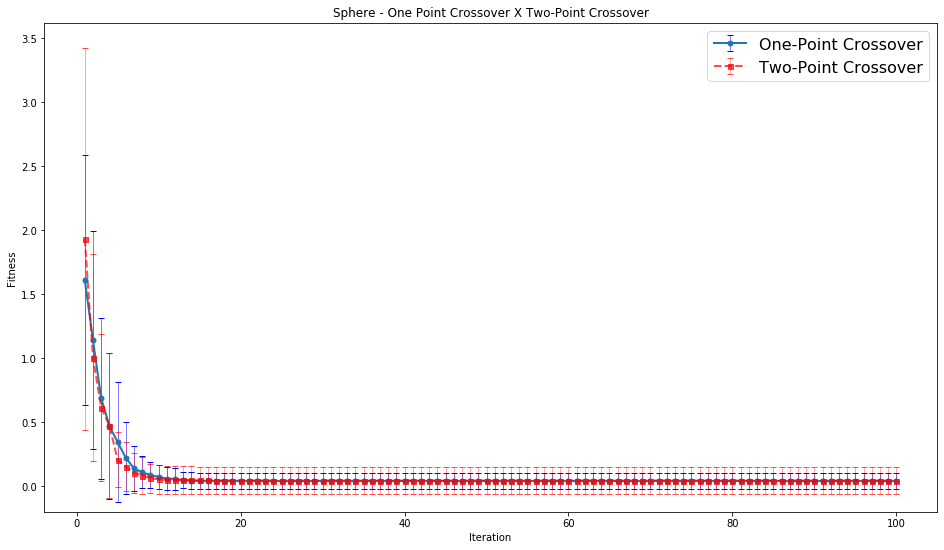

In [17]:
upper_limit = max(sphere_iter_mean_1[0], sphere_iter_mean_2[0]) + max(sphere_iter_std_1[0], sphere_iter_std_2[0]) + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-0.2, upper_limit) 
plt.errorbar(x, np.array(sphere_iter_mean_1), np.array(sphere_iter_std_1),
             ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="blue", elinewidth=elw,
             label="One-Point Crossover")
plt.errorbar(x, np.array(sphere_iter_mean_2), np.array(sphere_iter_std_2),
             ms=ms, ls="--", lw=lw, marker="s", capsize=capsize, ecolor="red", color="r",
             elinewidth=elw, label="Two-Point Crossover", alpha=0.7)
plt.title('Sphere - One Point Crossover X Two-Point Crossover')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})
plt.show()

### Rastringin

In [19]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]
rastringin_best_fitnesses_1 = []
rastringin_iter_results_1= [[] for i in range(num_gen)]
rastringin_iter_mean_1 = []
rastringin_iter_std_1 = []

rastringin_best_fitnesses_2 = []
rastringin_iter_results_2 = [[] for i in range(num_gen)]
rastringin_iter_mean_2 = []
rastringin_iter_std_2 = []

ga_1 = GA(rastringin, bounds, generations=num_gen, cx_strategy='one-point')
ga_2 = GA(rastringin, bounds, generations=num_gen)


for i in range(num_exec):
    _, execution_best_fitnesses_1 = ga_1.run()
    rastringin_best_fitnesses_1.append(execution_best_fitnesses_1)

for i in range(num_exec):
    _, execution_best_fitnesses_2 = ga_2.run()
    rastringin_best_fitnesses_2.append(execution_best_fitnesses_2)

    
# grouping results by iteration number
for i in range(len(rastringin_best_fitnesses_1)):
    for j in range(len(rastringin_best_fitnesses_1[i])):
        rastringin_iter_results_1[j].append(rastringin_best_fitnesses_1[i][j])
        rastringin_iter_results_2[j].append(rastringin_best_fitnesses_2[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(rastringin_iter_results_1)):
    rastringin_iter_mean_1.append(np.mean(rastringin_iter_results_1[i]))
    rastringin_iter_std_1.append(np.std(rastringin_iter_results_1[i]))
    
    rastringin_iter_mean_2.append(np.mean(rastringin_iter_results_2[i]))
    rastringin_iter_std_2.append(np.std(rastringin_iter_results_2[i]))

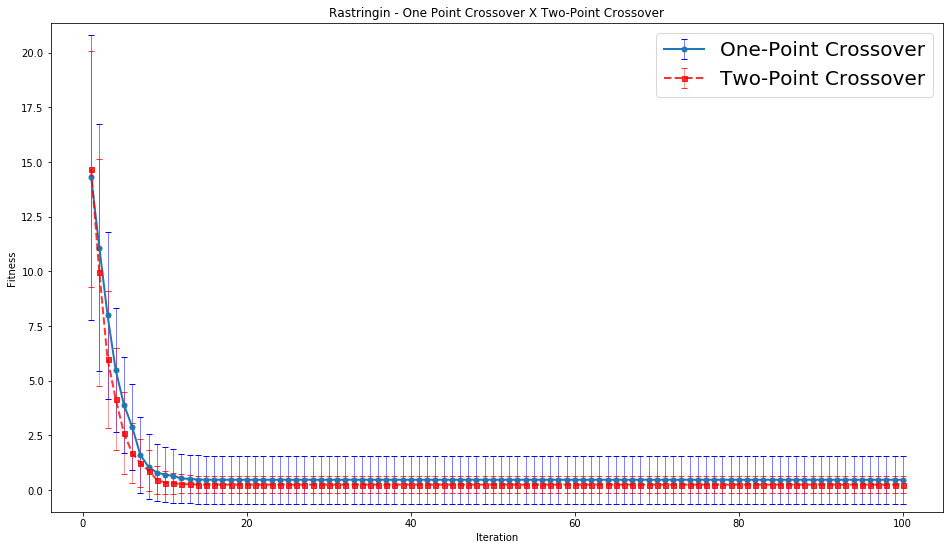

In [27]:
upper_limit = max(rastringin_iter_mean_1[0], rastringin_iter_mean_2[0]) + max(rastringin_iter_std_1[0], rastringin_iter_std_2[0]) + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-1, upper_limit) 
plt.errorbar(x, np.array(rastringin_iter_mean_1), np.array(rastringin_iter_std_1),
             ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="blue", elinewidth=elw, label="One-Point Crossover")
plt.errorbar(x, np.array(rastringin_iter_mean_2), np.array(rastringin_iter_std_2),
             ms=ms, ls="--", lw=lw, marker="s", capsize=capsize, ecolor="red", color="r", elinewidth=elw,
             label="Two-Point Crossover", alpha=0.8)
plt.title('Rastringin - One Point Crossover X Two-Point Crossover')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 20})
plt.show()

### Ackley

In [28]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]
ackley_best_fitnesses_1 = []
ackley_iter_results_1= [[] for i in range(num_gen)]
ackley_iter_mean_1 = []
ackley_iter_std_1 = []

ackley_best_fitnesses_2 = []
ackley_iter_results_2 = [[] for i in range(num_gen)]
ackley_iter_mean_2 = []
ackley_iter_std_2 = []

ga_1 = GA(ackley, bounds, generations=num_gen, cx_strategy='one-point')
ga_2 = GA(ackley, bounds, generations=num_gen)


for i in range(num_exec):
    _, execution_best_fitnesses_1 = ga_1.run()
    ackley_best_fitnesses_1.append(execution_best_fitnesses_1)

for i in range(num_exec):
    _, execution_best_fitnesses_2 = ga_2.run()
    ackley_best_fitnesses_2.append(execution_best_fitnesses_2)

    
# grouping results by iteration number
for i in range(len(ackley_best_fitnesses_1)):
    for j in range(len(ackley_best_fitnesses_1[i])):
        ackley_iter_results_1[j].append(ackley_best_fitnesses_1[i][j])
        ackley_iter_results_2[j].append(ackley_best_fitnesses_2[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(ackley_iter_results_1)):
    ackley_iter_mean_1.append(np.mean(ackley_iter_results_1[i]))
    ackley_iter_std_1.append(np.std(ackley_iter_results_1[i]))
    
    ackley_iter_mean_2.append(np.mean(ackley_iter_results_2[i]))
    ackley_iter_std_2.append(np.std(ackley_iter_results_2[i]))

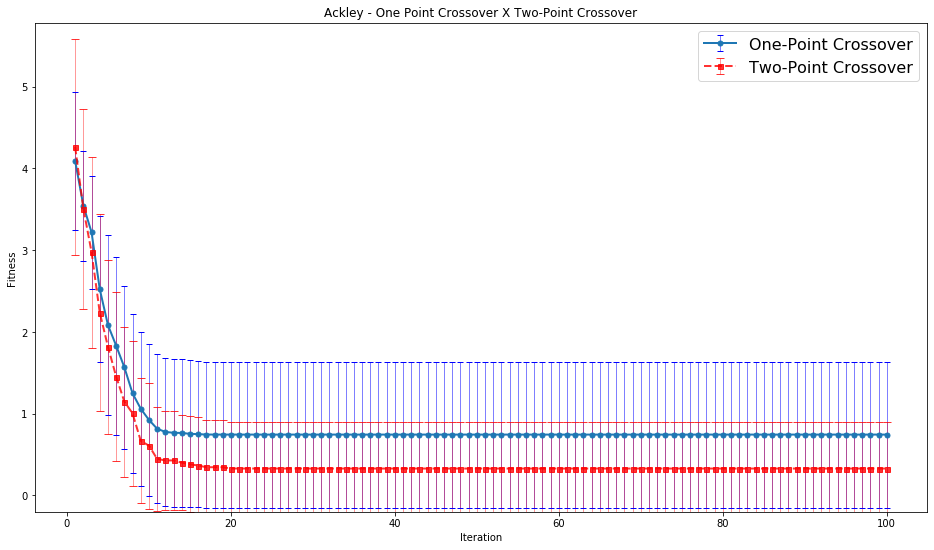

In [29]:
upper_limit = max(ackley_iter_mean_1[0], ackley_iter_mean_2[0]) + max(ackley_iter_std_1[0], ackley_iter_std_2[0]) + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-0.2, upper_limit) 

plt.errorbar(x, np.array(ackley_iter_mean_1), np.array(ackley_iter_std_1),
             ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="blue", elinewidth=elw, label="One-Point Crossover")

plt.errorbar(x, np.array(ackley_iter_mean_2), np.array(ackley_iter_std_2),
             ms=ms, ls="--", lw=lw, marker="s", capsize=4, ecolor="red", color="r", elinewidth=elw, 
             label="Two-Point Crossover", alpha=0.8)

plt.title('Ackley - One Point Crossover X Two-Point Crossover')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})
plt.show()

### Discussion

The obtained fitness was very similar with either strategy. We see a slightly faster descent on the first iterations of **sphere** and **rastringin** using the two-point crossover, while the opposite happens with ackley. We 

# Survivor selection

In this section, we analyze the impact of the survival strategy. We compare the fitness progression through the algorithm iterations for each strategy (elitist, roulette and random). Mean and Standard Deviation are obtained by repeating each experiment 30 times.

In [17]:
num_gen=100
num_exec=30
x = np.arange(1, num_gen+1, 1) # iteration number array

### Sphere

In [30]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_e = []
sphere_iter_results_e = [[] for i in range(num_gen)]
sphere_iter_mean_e = []
sphere_iter_std_e = []

sphere_best_fitnesses_ro = []
sphere_iter_results_ro = [[] for i in range(num_gen)]
sphere_iter_mean_ro = []
sphere_iter_std_ro = []

sphere_best_fitnesses_ra = []
sphere_iter_results_ra = [[] for i in range(num_gen)]
sphere_iter_mean_ra = []
sphere_iter_std_ra = []

ga_e = GA(sphere, bounds, generations=num_gen)
ga_ro = GA(sphere, bounds, generations=num_gen, sel_strategy='roulette')
ga_ra = GA(sphere, bounds, generations=num_gen, sel_strategy='random')

for i in range(num_exec):
    _, execution_best_fitnesses_e = ga_e.run()
    sphere_best_fitnesses_e.append(execution_best_fitnesses_e)

for i in range(num_exec):
    _, execution_best_fitnesses_ro = ga_ro.run()
    sphere_best_fitnesses_ro.append(execution_best_fitnesses_ro)

for i in range(num_exec):
    _, execution_best_fitnesses_ra = ga_ra.run()
    sphere_best_fitnesses_ra.append(execution_best_fitnesses_ra)
    
# grouping results by iteration number
for i in range(len(sphere_best_fitnesses_e)):
    for j in range(len(sphere_best_fitnesses_e[i])):
        sphere_iter_results_e[j].append(sphere_best_fitnesses_e[i][j])
        sphere_iter_results_ro[j].append(sphere_best_fitnesses_ro[i][j])
        sphere_iter_results_ra[j].append(sphere_best_fitnesses_ra[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(sphere_iter_results_e)):
    sphere_iter_mean_e.append(np.mean(sphere_iter_results_e[i]))
    sphere_iter_std_e.append(np.std(sphere_iter_results_e[i]))
    
    sphere_iter_mean_ro.append(np.mean(sphere_iter_results_ro[i]))
    sphere_iter_std_ro.append(np.std(sphere_iter_results_ro[i]))

    sphere_iter_mean_ra.append(np.mean(sphere_iter_results_ra[i]))
    sphere_iter_std_ra.append(np.std(sphere_iter_results_ra[i]))

### Sphere - Results

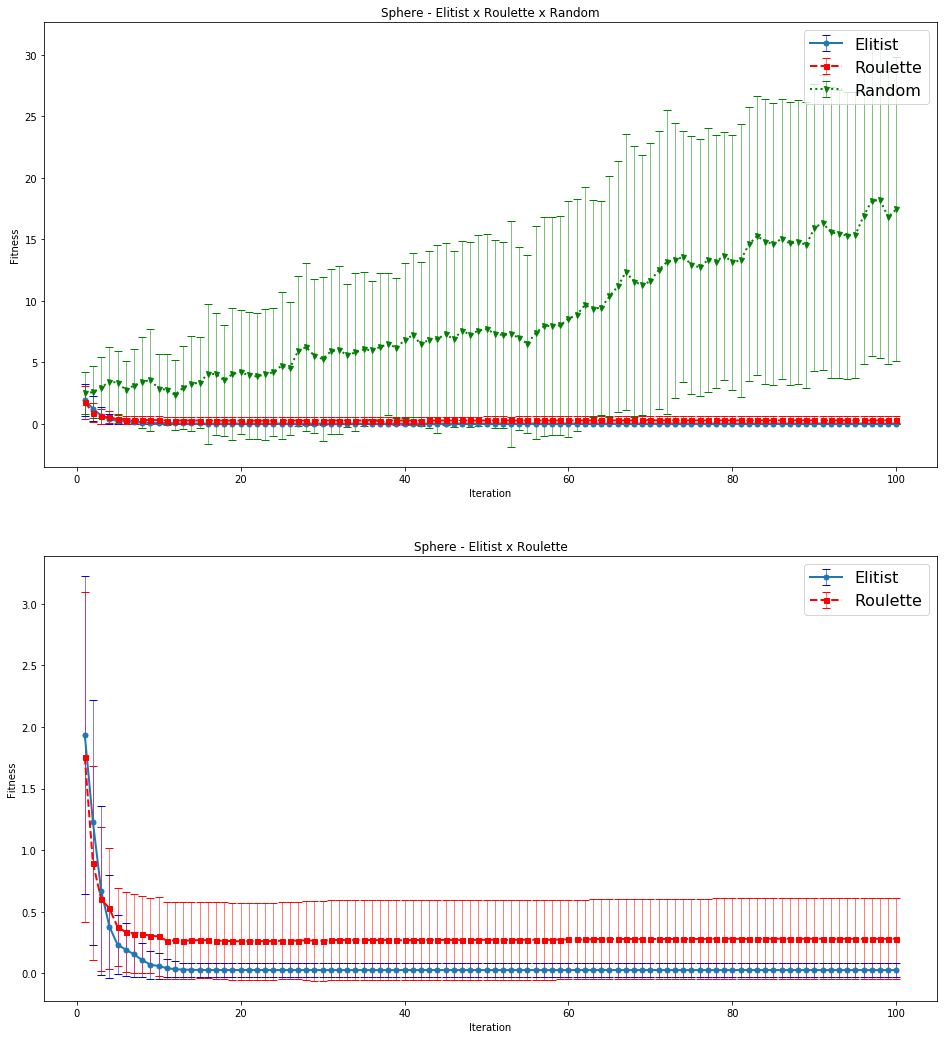

In [31]:
plt.figure(figsize=(16, 18))

plt.subplot(2, 1, 1)
plt.errorbar(x, np.array(sphere_iter_mean_e), np.array(sphere_iter_std_e), ms=ms, lw=lw, marker="o", capsize=4, ecolor="blue", elinewidth=elw, label='Elitist')
plt.errorbar(x, np.array(sphere_iter_mean_ro), np.array(sphere_iter_std_ro), ms=ms, ls = 'dashed', lw=lw, marker="s", capsize=4, ecolor="red", color="red", elinewidth=elw, label='Roulette')
plt.errorbar(x, np.array(sphere_iter_mean_ra), np.array(sphere_iter_std_ra), ms=ms, ls = 'dotted', lw=lw, marker="v", capsize=4, ecolor="green", color="green", elinewidth=elw, label='Random')
plt.title('Sphere - Elitist x Roulette x Random')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.subplot(2, 1, 2)
plt.errorbar(x, np.array(sphere_iter_mean_e), np.array(sphere_iter_std_e), ms=ms, lw=lw, marker="o", capsize=4, ecolor="blue", elinewidth=elw, label='Elitist')
plt.errorbar(x, np.array(sphere_iter_mean_ro), np.array(sphere_iter_std_ro), ms=ms, ls = 'dashed', lw=lw, marker="s", capsize=4, ecolor="red", color="red", elinewidth=elw, label='Roulette')
plt.title('Sphere - Elitist x Roulette')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.show()


### Rastringin

In [32]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_best_fitnesses_e = []
rastringin_iter_results_e = [[] for i in range(num_gen)]
rastringin_iter_mean_e = []
rastringin_iter_std_e = []

rastringin_best_fitnesses_ro = []
rastringin_iter_results_ro = [[] for i in range(num_gen)]
rastringin_iter_mean_ro = []
rastringin_iter_std_ro = []

rastringin_best_fitnesses_ra = []
rastringin_iter_results_ra = [[] for i in range(num_gen)]
rastringin_iter_mean_ra = []
rastringin_iter_std_ra = []

ga_e = GA(rastringin, bounds, generations=num_gen)
ga_ro = GA(rastringin, bounds, generations=num_gen, sel_strategy='roulette')
ga_ra = GA(rastringin, bounds, generations=num_gen, sel_strategy='random')

for i in range(num_exec):
    _, execution_best_fitnesses_e = ga_e.run()
    rastringin_best_fitnesses_e.append(execution_best_fitnesses_e)

for i in range(num_exec):
    _, execution_best_fitnesses_ro = ga_ro.run()
    rastringin_best_fitnesses_ro.append(execution_best_fitnesses_ro)

for i in range(num_exec):
    _, execution_best_fitnesses_ra = ga_ra.run()
    rastringin_best_fitnesses_ra.append(execution_best_fitnesses_ra)
    
# grouping results by iteration number
for i in range(len(rastringin_best_fitnesses_e)):
    for j in range(len(rastringin_best_fitnesses_e[i])):
        rastringin_iter_results_e[j].append(rastringin_best_fitnesses_e[i][j])
        rastringin_iter_results_ro[j].append(rastringin_best_fitnesses_ro[i][j])
        rastringin_iter_results_ra[j].append(rastringin_best_fitnesses_ra[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(rastringin_iter_results_e)):
    rastringin_iter_mean_e.append(np.mean(rastringin_iter_results_e[i]))
    rastringin_iter_std_e.append(np.std(rastringin_iter_results_e[i]))
    
    rastringin_iter_mean_ro.append(np.mean(rastringin_iter_results_ro[i]))
    rastringin_iter_std_ro.append(np.std(rastringin_iter_results_ro[i]))

    rastringin_iter_mean_ra.append(np.mean(rastringin_iter_results_ra[i]))
    rastringin_iter_std_ra.append(np.std(rastringin_iter_results_ra[i]))

### Rastringin - Results

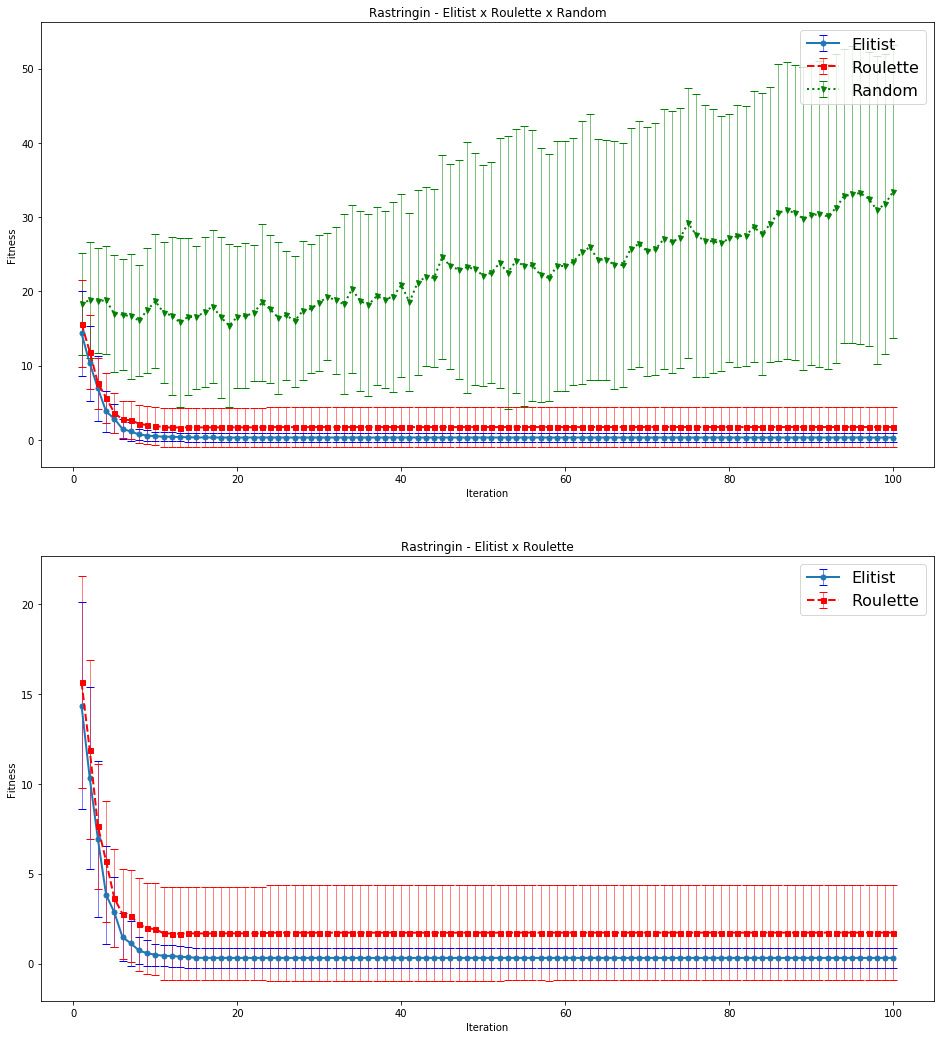

In [33]:
plt.figure(figsize=(16, 18))

plt.subplot(2, 1, 1)
plt.errorbar(x, np.array(rastringin_iter_mean_e), np.array(rastringin_iter_std_e), ms=ms, lw=lw, marker="o", capsize=4, ecolor="blue", elinewidth=elw, label='Elitist')
plt.errorbar(x, np.array(rastringin_iter_mean_ro), np.array(rastringin_iter_std_ro), ms=ms, ls = 'dashed', lw=lw, marker="s", capsize=4, ecolor="red", color="red", elinewidth=elw, label='Roulette')
plt.errorbar(x, np.array(rastringin_iter_mean_ra), np.array(rastringin_iter_std_ra), ms=ms, ls = 'dotted', lw=lw, marker="v", capsize=4, ecolor="green", color="green", elinewidth=elw, label='Random')
plt.title('Rastringin - Elitist x Roulette x Random')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.subplot(2, 1, 2)
plt.errorbar(x, np.array(rastringin_iter_mean_e), np.array(rastringin_iter_std_e), ms=ms, lw=lw, marker="o", capsize=4, ecolor="blue", elinewidth=elw, label='Elitist')
plt.errorbar(x, np.array(rastringin_iter_mean_ro), np.array(rastringin_iter_std_ro), ms=ms, ls = 'dashed', lw=lw, marker="s", capsize=4, ecolor="red", color="red", elinewidth=elw, label='Roulette')
plt.title('Rastringin - Elitist x Roulette')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.show() 

### Ackley

In [34]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_best_fitnesses_e = []
ackley_iter_results_e = [[] for i in range(num_gen)]
ackley_iter_mean_e = []
ackley_iter_std_e = []

ackley_best_fitnesses_ro = []
ackley_iter_results_ro = [[] for i in range(num_gen)]
ackley_iter_mean_ro = []
ackley_iter_std_ro = []

ackley_best_fitnesses_ra = []
ackley_iter_results_ra = [[] for i in range(num_gen)]
ackley_iter_mean_ra = []
ackley_iter_std_ra = []

ga_e = GA(ackley, bounds, generations=num_gen)
ga_ro = GA(ackley, bounds, generations=num_gen, sel_strategy='roulette')
ga_ra = GA(ackley, bounds, generations=num_gen, sel_strategy='random')

for i in range(num_exec):
    _, execution_best_fitnesses_e = ga_e.run()
    ackley_best_fitnesses_e.append(execution_best_fitnesses_e)

for i in range(num_exec):
    _, execution_best_fitnesses_ro = ga_ro.run()
    ackley_best_fitnesses_ro.append(execution_best_fitnesses_ro)

for i in range(num_exec):
    _, execution_best_fitnesses_ra = ga_ra.run()
    ackley_best_fitnesses_ra.append(execution_best_fitnesses_ra)
    
# grouping results by iteration number
for i in range(len(ackley_best_fitnesses_e)):
    for j in range(len(ackley_best_fitnesses_e[i])):
        ackley_iter_results_e[j].append(ackley_best_fitnesses_e[i][j])
        ackley_iter_results_ro[j].append(ackley_best_fitnesses_ro[i][j])
        ackley_iter_results_ra[j].append(ackley_best_fitnesses_ra[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(ackley_iter_results_e)):
    ackley_iter_mean_e.append(np.mean(ackley_iter_results_e[i]))
    ackley_iter_std_e.append(np.std(ackley_iter_results_e[i]))
    
    ackley_iter_mean_ro.append(np.mean(ackley_iter_results_ro[i]))
    ackley_iter_std_ro.append(np.std(ackley_iter_results_ro[i]))

    ackley_iter_mean_ra.append(np.mean(ackley_iter_results_ra[i]))
    ackley_iter_std_ra.append(np.std(ackley_iter_results_ra[i]))

### Ackley - Results

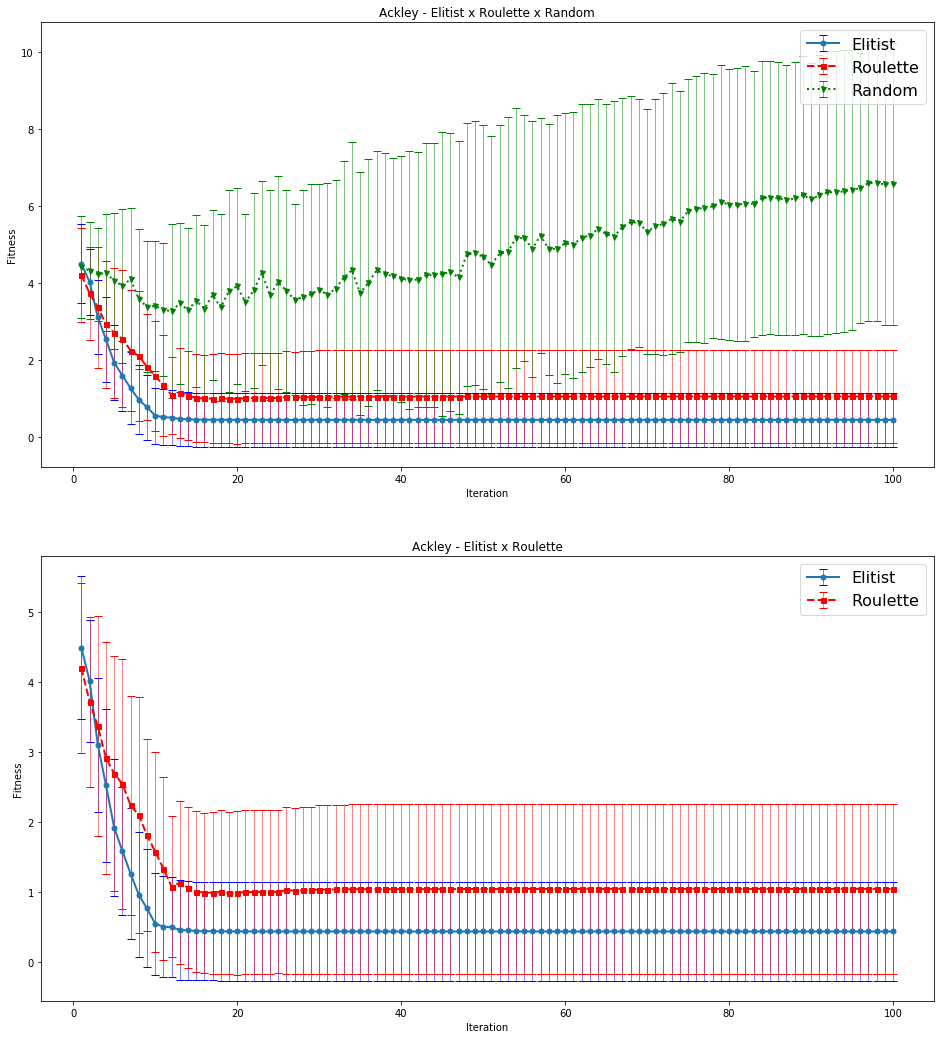

In [35]:

plt.figure(figsize=(16, 18))

plt.subplot(2, 1, 1)
plt.errorbar(x, np.array(ackley_iter_mean_e), np.array(ackley_iter_std_e), ms=ms, lw=lw, marker="o", capsize=4, ecolor="blue", elinewidth=elw, label='Elitist')
plt.errorbar(x, np.array(ackley_iter_mean_ro), np.array(ackley_iter_std_ro), ms=ms, ls = 'dashed', lw=lw, marker="s", capsize=4, ecolor="red", color="red", elinewidth=elw, label='Roulette')
plt.errorbar(x, np.array(ackley_iter_mean_ra), np.array(ackley_iter_std_ra), ms=ms, ls = 'dotted', lw=lw, marker="v", capsize=4, ecolor="green", color="green", elinewidth=elw, label='Random')
plt.title('Ackley - Elitist x Roulette x Random')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.subplot(2, 1, 2)
plt.errorbar(x, np.array(ackley_iter_mean_e), np.array(ackley_iter_std_e), ms=ms, lw=lw, marker="o", capsize=4, ecolor="blue", elinewidth=elw, label='Elitist')
plt.errorbar(x, np.array(ackley_iter_mean_ro), np.array(ackley_iter_std_ro), ms=ms, ls = 'dashed', lw=lw, marker="s", capsize=4, ecolor="red", color="red", elinewidth=elw, label='Roulette')
plt.title('Ackley - Elitist x Roulette')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.show() 

# Mutation

In this section, we analyze the impact of mutation to performance. We compare the fitness progression through the algorithm iterations for the same algorithm with a 3% mutation (bit flip) and without any mutation. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

In [36]:
num_gen = 100
num_exec = 30
x = np.arange(1, num_gen+1, 1) # iteration number array

# plot settings
ms = 5
lw = 2
capsize = 3
elw = 0.5

### Sphere

In [37]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_m = []
sphere_iter_results_m= [[] for i in range(num_gen)]
sphere_iter_mean_m = []
sphere_iter_std_m = []

sphere_best_fitnesses_n = []
sphere_iter_results_n = [[] for i in range(num_gen)]
sphere_iter_mean_n = []
sphere_iter_std_n = []

ga_m = GA(sphere, bounds, generations=num_gen, mt_prob=0.03)
ga_n = GA(sphere, bounds, generations=num_gen)


for i in range(num_exec):
    _, execution_best_fitnesses_m = ga_m.run()
    sphere_best_fitnesses_m.append(execution_best_fitnesses_m)

for i in range(num_exec):
    _, execution_best_fitnesses_n = ga_n.run()
    sphere_best_fitnesses_n.append(execution_best_fitnesses_n)

    
# grouping results by iteration number
for i in range(len(sphere_best_fitnesses_m)):
    for j in range(len(sphere_best_fitnesses_m[i])):
        sphere_iter_results_m[j].append(sphere_best_fitnesses_m[i][j])
        sphere_iter_results_n[j].append(sphere_best_fitnesses_n[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(sphere_iter_results_m)):
    sphere_iter_mean_m.append(np.mean(sphere_iter_results_m[i]))
    sphere_iter_std_m.append(np.std(sphere_iter_results_m[i]))
    
    sphere_iter_mean_n.append(np.mean(sphere_iter_results_n[i]))
    sphere_iter_std_n.append(np.std(sphere_iter_results_n[i]))

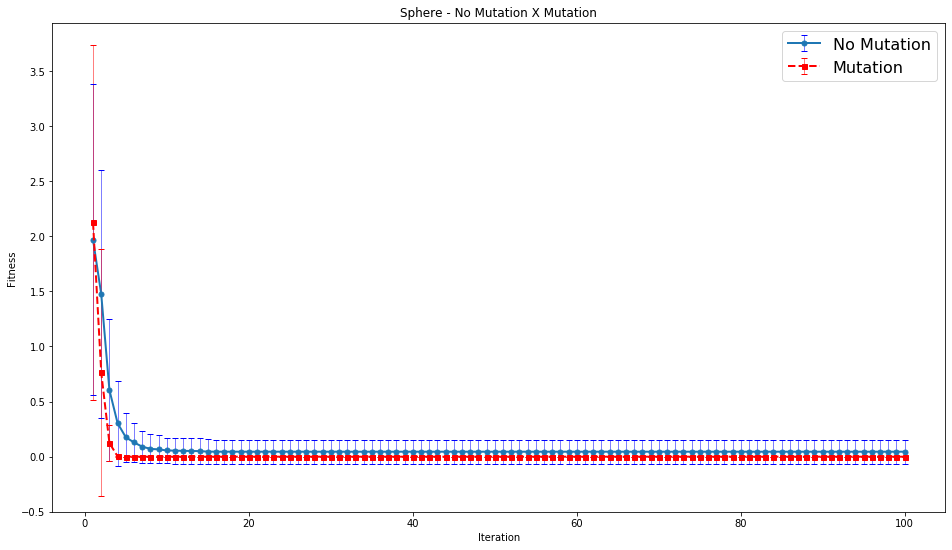

In [41]:
upper_limit = max(sphere_iter_mean_m[0], sphere_iter_mean_n[0]) + max(sphere_iter_std_m[0], sphere_iter_std_n[0]) + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-0.5, upper_limit)
plt.errorbar(x, np.array(sphere_iter_mean_n), np.array(sphere_iter_std_n),
             ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="blue", elinewidth=elw, label="No Mutation")
plt.errorbar(x, np.array(sphere_iter_mean_m), np.array(sphere_iter_std_m),
             ms=ms, ls="--", lw=lw, marker="s", capsize=capsize, ecolor="red", color="r", elinewidth=elw, label="Mutation")
plt.title('Sphere - No Mutation X Mutation')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})
plt.show()

### Rastringin

In [43]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]
rastringin_best_fitnesses_m = []
rastringin_iter_results_m= [[] for i in range(num_gen)]
rastringin_iter_mean_m = []
rastringin_iter_std_m = []

rastringin_best_fitnesses_n = []
rastringin_iter_results_n = [[] for i in range(num_gen)]
rastringin_iter_mean_n = []
rastringin_iter_std_n = []

ga_m = GA(rastringin, bounds, generations=num_gen, mt_prob=0.03)
ga_n = GA(rastringin, bounds, generations=num_gen)


for i in range(num_exec):
    _, execution_best_fitnesses_m = ga_m.run()
    rastringin_best_fitnesses_m.append(execution_best_fitnesses_m)

for i in range(num_exec):
    _, execution_best_fitnesses_n = ga_n.run()
    rastringin_best_fitnesses_n.append(execution_best_fitnesses_n)

    
# grouping results by iteration number
for i in range(len(rastringin_best_fitnesses_m)):
    for j in range(len(rastringin_best_fitnesses_m[i])):
        rastringin_iter_results_m[j].append(rastringin_best_fitnesses_m[i][j])
        rastringin_iter_results_n[j].append(rastringin_best_fitnesses_n[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(rastringin_iter_results_m)):
    rastringin_iter_mean_m.append(np.mean(rastringin_iter_results_m[i]))
    rastringin_iter_std_m.append(np.std(rastringin_iter_results_m[i]))
    
    rastringin_iter_mean_n.append(np.mean(rastringin_iter_results_n[i]))
    rastringin_iter_std_n.append(np.std(rastringin_iter_results_n[i]))

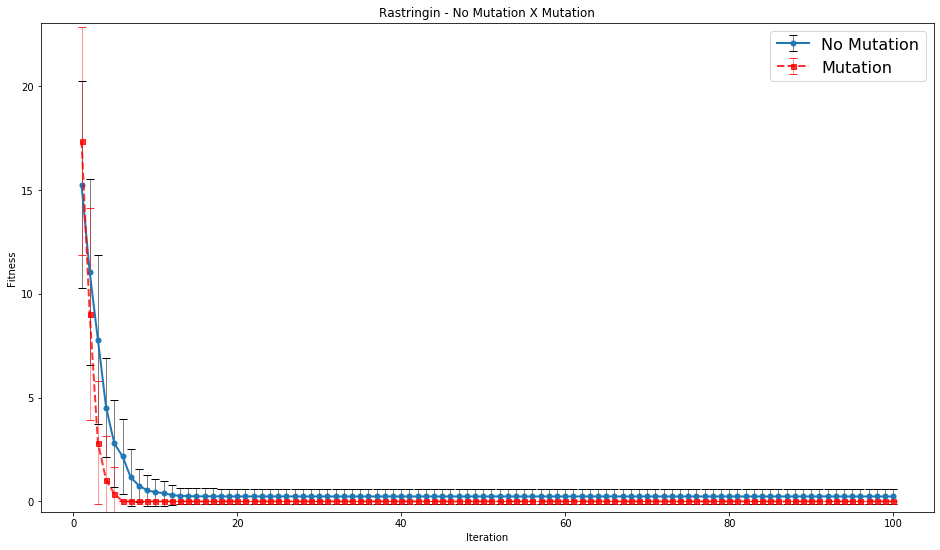

In [45]:
upper_limit = max(rastringin_iter_mean_m[0], rastringin_iter_mean_n[0]) + max(rastringin_iter_std_m[0], rastringin_iter_std_n[0]) + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-0.5, upper_limit)
plt.errorbar(x, np.array(rastringin_iter_mean_n), np.array(rastringin_iter_std_n), ms=ms, lw=lw, marker="o", capsize=4, ecolor="black", elinewidth=elw, label="No Mutation")
plt.errorbar(x, np.array(rastringin_iter_mean_m), np.array(rastringin_iter_std_m), ms=ms, ls="--", lw=lw, marker="s", capsize=4, ecolor="red",color="r", elinewidth=elw, label="Mutation", alpha=0.8)
plt.title('Rastringin - No Mutation X Mutation')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})
plt.show()


### Ackley

In [46]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]
ackley_best_fitnesses_m = []
ackley_iter_results_m= [[] for i in range(num_gen)]
ackley_iter_mean_m = []
ackley_iter_std_m = []

ackley_best_fitnesses_n = []
ackley_iter_results_n = [[] for i in range(num_gen)]
ackley_iter_mean_n = []
ackley_iter_std_n = []

ga_m = GA(ackley, bounds, generations=num_gen, mt_prob=0.03)
ga_n = GA(ackley, bounds, generations=num_gen)


for i in range(num_exec):
    _, execution_best_fitnesses_m = ga_m.run()
    ackley_best_fitnesses_m.append(execution_best_fitnesses_m)

for i in range(num_exec):
    _, execution_best_fitnesses_n = ga_n.run()
    ackley_best_fitnesses_n.append(execution_best_fitnesses_n)

    
# grouping results by iteration number
for i in range(len(ackley_best_fitnesses_m)):
    for j in range(len(ackley_best_fitnesses_m[i])):
        ackley_iter_results_m[j].append(ackley_best_fitnesses_m[i][j])
        ackley_iter_results_n[j].append(ackley_best_fitnesses_n[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(ackley_iter_results_m)):
    ackley_iter_mean_m.append(np.mean(ackley_iter_results_m[i]))
    ackley_iter_std_m.append(np.std(ackley_iter_results_m[i]))
    
    ackley_iter_mean_n.append(np.mean(ackley_iter_results_n[i]))
    ackley_iter_std_n.append(np.std(ackley_iter_results_n[i]))

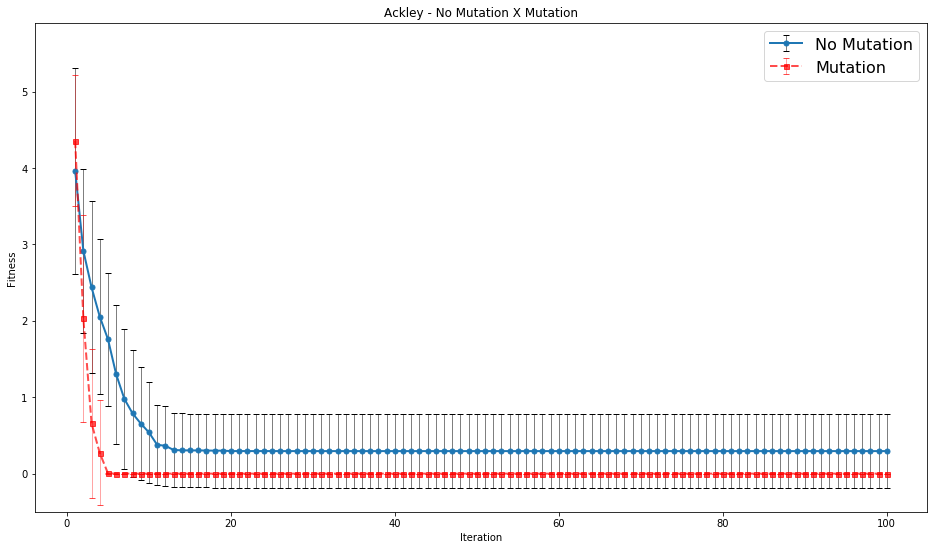

In [48]:
upper_limit = max(ackley_iter_mean_m[0], ackley_iter_mean_n[0]) + max(ackley_iter_std_m[0], ackley_iter_std_n[0]) + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-0.5, upper_limit)
plt.errorbar(x, np.array(ackley_iter_mean_n), np.array(ackley_iter_std_n), ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="black", elinewidth=elw, label="No Mutation")
plt.errorbar(x, np.array(ackley_iter_mean_m), np.array(ackley_iter_std_m), ms=ms, ls="--", lw=lw, marker="s", capsize=capsize, ecolor="red",color="r", elinewidth=elw, label="Mutation", alpha=0.7)
plt.title('Ackley - No Mutation X Mutation')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})
plt.show()